In [72]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import pandas as pd
import lmfit
from lmfit.lineshapes import gaussian2d
import random

address = 'D:/HomeWork/Pattern/SPR_HW1/inputs/P6/first_half_logs/first_half_logs.csv'
df = pd.read_csv(address)

In [57]:
#Calculate mean and Standard deviation.
def calculate_tools(x):
    mean = np.mean(x)
    sd = np.std(x)
    cov_mat = np.stack((x['x_pos'], x['y_pos']), axis = 0)
    cov = np.cov(cov_mat)
    coe = (cov[0][1])/(sd['x_pos'] * sd['y_pos'])
    return mean , sd , cov , coe

In [58]:
players = [1 , 2, 5, 7 ,8 , 9 ,10 , 3 , 13 , 14 , 15]
data = df[['tag_id' , 'x_pos' , 'y_pos']]
data = data[data['tag_id'] == 15]
mean , sd , cov , coe = calculate_tools(data)

tag_id    15.000000
x_pos     59.110189
y_pos     32.753619
dtype: float64
[[471.29399862 -21.73061822]
 [-21.73061822 228.20383144]]


In [59]:
x = data['x_pos']
y = data['y_pos']
z = gaussian2d(x, y, centerx=mean['x_pos'], centery=mean['y_pos'], sigmax=sd['x_pos'], sigmay=sd['y_pos'])

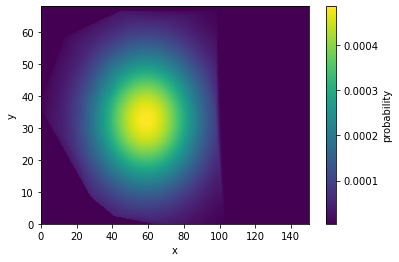

In [60]:
X, Y = np.meshgrid(np.linspace(x.min(), x.max(),1000),
                   np.linspace(y.min(), y.max(), 1000))

Z = griddata((x, y), z, (X, Y))
fig, ax = plt.subplots()
art = ax.pcolor(X, Y, Z, shading='auto')

plt.colorbar(art, ax=ax, label='probability')
ax.set_facecolor('#440154')
ax.set_xlim([0, 150])
ax.set_ylim([0, 68])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()